In [17]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [22]:
df = datasets.load_iris().data

<h1>Algoritam</h1>

In [25]:
n_centers = 3

# Odabir indeksa koji predstavljaju centar
new_centers = df[np.random.choice(range(df.shape[0]), n_centers, replace=False)]
centers = new_centers
    
while True:

    # Odredjivanje distanci do trenutnih centara
    distances = np.zeros((df.shape[0], n_centers))
    
    for i in range(df.shape[0]):
        row = df[i]
        for idx, center in enumerate(new_centers):
            result = (row - center) ** 2
            euclidean_distance = np.sqrt(result.sum())
            distances[i, idx] = euclidean_distance
    
            
    # Odredjivanje koji centar je najblizi
    nearest_centers_index = []
    
    for i in range(0, distances.shape[0]):
        row = distances[i].tolist()
        nearest_centers_index.append(row.index(min(row)))
            
    # Odredjivanje novih centara
    new_centers = []
    
    for i in range(0, n_centers):
        sum = 0
        count = 0
        for j in range(0, distances.shape[0]):
            if(nearest_centers_index[j] == i):
                sum += df[j]
                count += 1
        new_center = sum/count
        new_centers.append(new_center)
    
    # Provera da li je doslo do konvergiranja
    if np.allclose(centers, new_centers):
        break
    else:
        centers = np.array(new_centers)

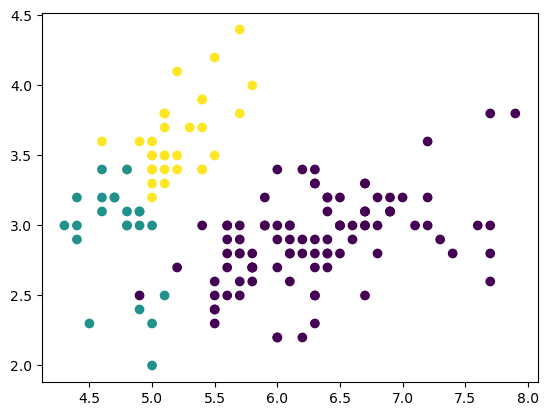

In [26]:
import matplotlib.pyplot as plt
plt.scatter(df[:,0],df[:,1],c=nearest_centers_index)